In [1]:
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from tensorflow import keras
import numpy as np
import random
import pandas as pd
from tensorflow.keras import layers


In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score

In [3]:
train_data = pd.read_csv('C:\\Users\\thinh\\Downloads\\MNIST_Dataset\\fashion-mnist_train.csv')
test_data = pd.read_csv('C:\\Users\\thinh\\Downloads\\MNIST_Dataset\\fashion-mnist_test.csv')

In [4]:
train = np.array(train_data, dtype = 'float32')
test = np.array(test_data, dtype = 'float32')

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
class_nums = len(class_names)

In [6]:
X_train = train[:, 1:] / 255
y_train = train[:, 0]

X_test = test[:, 1:] / 255
y_test = test[:,0]

In [7]:
X_train = X_train.reshape(X_train.shape[0], * (28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], * (28, 28, 1))

In [8]:
y_train = keras.utils.to_categorical(y_train, class_nums)
y_test = keras.utils.to_categorical(y_test, class_nums)

In [9]:
input_shape = (28,28,1)

In [11]:
from keras import regularizers

model = keras.models.Sequential([
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    layers.BatchNormalization(),
    layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(256, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(input_shape = input_shape),
    layers.Dense(1024, activation = 'relu',kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0,5),
    layers.Dense(512, activation = 'relu',kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0,5),
    layers.Dense(256, activation = 'relu',kernel_regularizer=regularizers.l2(0.01) ),
    layers.Dropout(0,5),
    layers.Dense(128, activation = 'relu',kernel_regularizer=regularizers.l2(0.01) ),
    layers.Dropout(0,5),
    layers.Dense(class_nums, activation = 'softmax')
])  

model.compile(loss="categorical_crossentropy",
              optimizer='rmsprop',
              metrics=["accuracy"])
epochs = 20
batch_size = 128
history = model.fit(X_train, y_train,
          epochs= epochs,
          batch_size = batch_size,
          validation_split=0.1
          )

model.evaluate(X_test, y_test, batch_size=batch_size)





Epoch 1/20
422/422 [==============================] - 171s 403ms/step - loss: 2.5181 - accuracy: 0.7561 - val_loss: 0.9739 - val_accuracy: 0.8298
Epoch 2/20
422/422 [==============================] - 164s 388ms/step - loss: 0.5284 - accuracy: 0.8659 - val_loss: 0.4478 - val_accuracy: 0.8883
Epoch 3/20
422/422 [==============================] - 173s 410ms/step - loss: 0.4323 - accuracy: 0.8860 - val_loss: 0.4016 - val_accuracy: 0.8975
Epoch 4/20
422/422 [==============================] - 160s 380ms/step - loss: 0.3900 - accuracy: 0.8955 - val_loss: 0.4190 - val_accuracy: 0.8833
Epoch 5/20
422/422 [==============================] - 157s 372ms/step - loss: 0.3587 - accuracy: 0.9039 - val_loss: 0.3439 - val_accuracy: 0.9140
Epoch 6/20
422/422 [==============================] - 161s 382ms/step - loss: 0.3389 - accuracy: 0.9094 - val_loss: 0.3352 - val_accuracy: 0.9115
Epoch 7/20
422/422 [==============================] - 158s 375ms/step - loss: 0.3229 - accuracy: 0.9145 - val_loss: 0.4421 -

[0.278239369392395, 0.9233999848365784]

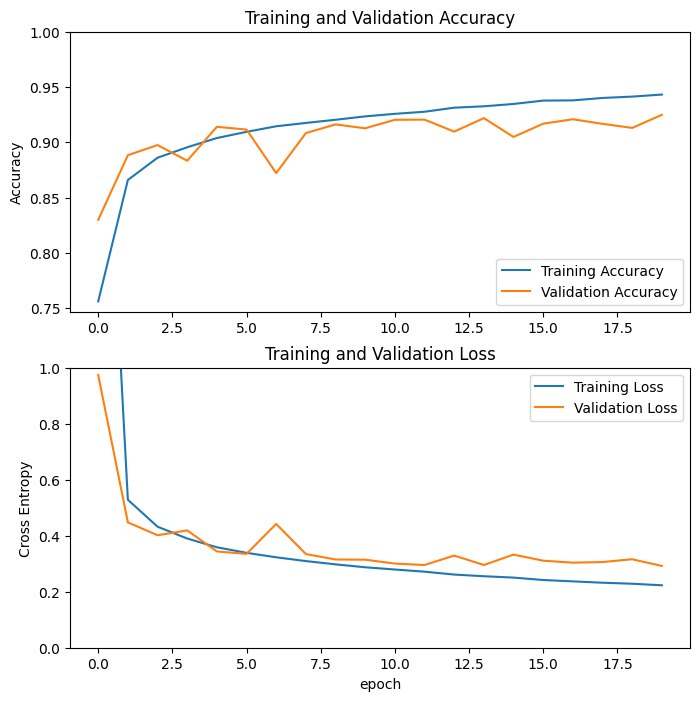

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()